<a href="https://colab.research.google.com/github/thuva18/BrainTumorDetection/blob/main/IT24103701_Preprocessing_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original dimensions: 1024
Reduced dimensions: 90
Explained variance ratio (top 5): [0.01758151-5.60373422e-35j 0.01689393-5.38458297e-35j
 0.01649285-5.25674747e-35j 0.01619074-5.16045676e-35j
 0.01557429-4.96397562e-35j]


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


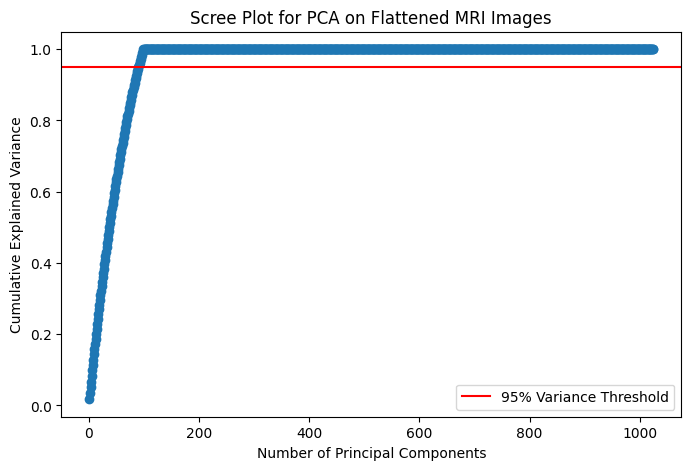

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # If sklearn is available; otherwise, implement manually as below
# Note: If sklearn isn't in your env, use NumPy for manual PCA (example below)

# Step 1: Load and preprocess images (假设 example data; replace with your actual MRI dataset)
# For demo, generate synthetic image data (e.g., 100 samples, each 32x32 flattened to 1024 features)
num_samples = 100
image_size = 32
X = np.random.rand(num_samples, image_size * image_size)  # Replace with flattened MRI images

# Mean-center the data (required for PCA)
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Manual PCA implementation using NumPy (covariance method)
cov_matrix = np.cov(X_centered.T)  # Covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Eigen decomposition

# Sort eigenvalues and eigenvectors descending
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Select top k components (e.g., keep 95% variance)
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
k = np.argmax(cumulative_variance >= 0.95) + 1  # Number of components for 95% variance

# Project data onto top k components
principal_components = eigenvectors[:, :k]
X_reduced = X_centered @ principal_components

print(f"Original dimensions: {X.shape[1]}")
print(f"Reduced dimensions: {k}")
print(f"Explained variance ratio (top 5): {eigenvalues[:5] / np.sum(eigenvalues)}")

# If using PyTorch for larger datasets (since torch is available in some envs)
import torch
U, S, V = torch.pca_lowrank(torch.tensor(X_centered), q=k)
X_reduced_torch = torch.mm(torch.tensor(X_centered), V[:, :k])

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA on Flattened MRI Images')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend()
plt.show()